# Ensambles

Son una combinación de múltiples modelos, que se llaman estimadores base, para mejorar la capacidad de generalización y robustez de un modelo.

In [3]:
# Importar librerias
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Carga de datos

In [11]:
# Cargar la base de dattos
digits = load_digits()
X=digits.data
y=digits.target

In [12]:
# Visualizar qué forma tienen los datos
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

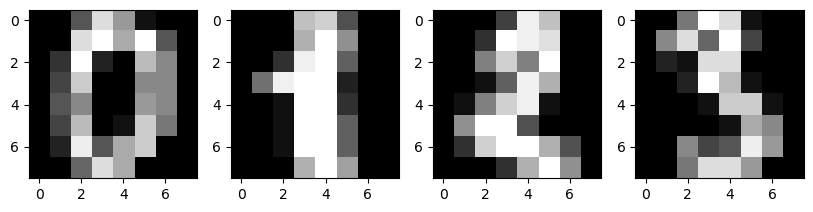

In [13]:
# Ver algunas imágenes
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,4, figsize=(10,3))
for ax,  image, label in zip(axes, digits.images, y):
    ax.imshow(image, cmap='gray')

plt.show()

In [15]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state =42)

## Arbol de decisión

In [ ]:
# Importamos la librería
from sklearn.tree import DecisionTreeClassifier

In [18]:
# Crear y entrenar el modelo
tree = DecisionTreeClassifier(random_state =42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
y_pred_tree=tree.predict(X_test)

# Calcular el Accuracy
accuracy_tree=accuracy_score(y_test, y_pred_tree)

accuracy_tree

0.8416666666666667

## Ensambles

### Bagging

Implica entrenar múltiples modelos en diferentes subconjuntos de datos de la base Train.


In [22]:
from sklearn.ensemble import BaggingClassifier

In [24]:
#Creamos y entrenamos el modelo
bagging=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators= 50, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [25]:
y_pred_bagging=bagging.predict(X_test)

# Calcular el Accuracy
accuracy_bagging=accuracy_score(y_test, y_pred_bagging)

accuracy_bagging

0.9555555555555556

### AdaBoost

Es una técnica que combina múltiples modelos débiles para formar un modelo fuerte. Este se enfoca en corregir los errores de los modelos anteriores.

In [43]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth=4), n_estimators=100, learning_rate= 0.5,random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [44]:
y_pred_ada=ada.predict(X_test)

# Calcular el Accuracy
accuracy_ada=accuracy_score(y_test, y_pred_ada)

accuracy_ada

0.9694444444444444

### Stacking

Técnica que combina distintos tipos de modelos para hacer la predicción final.

In [57]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

In [54]:
estimators=[('dt', DecisionTreeClassifier()), ('lg', LogisticRegression())]

In [55]:
stacking = StackingClassifier(estimators= estimators )
stacking.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('lg', LogisticRegression())])

In [56]:
y_pred_stacking=stacking.predict(X_test)

# Calcular el Accuracy
accuracy_stacking=accuracy_score(y_test, y_pred_stacking)

accuracy_stacking

0.9722222222222222